In [1]:
import numpy as np
import pandas as pd
import os
import glob
import math
import matplotlib.pyplot as plt
import seaborn as sbn



In [2]:
gp=pd.read_csv(r"C:\Users\harid\OneDrive\Desktop\python\data\datasets from kaggle\googleplaystore.csv")

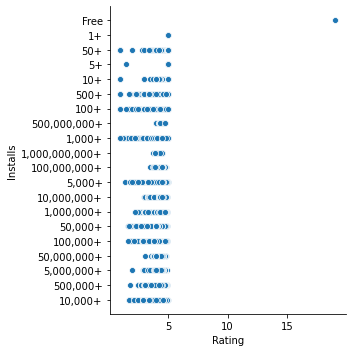

In [5]:
sbn.relplot(x="Rating",y="Installs",data=gp)

In [4]:
gp.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [6]:
gp.shape

(10841, 13)

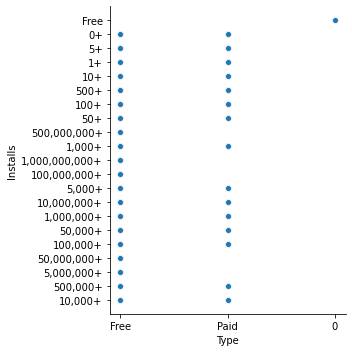

In [11]:
sbn.relplot(x="Type",y="Installs",data=gp)

In [14]:
gp["App"].value_counts

<bound method IndexOpsMixin.value_counts of 0           Photo Editor & Candy Camera & Grid & ScrapBook
1                                      Coloring book moana
2        U Launcher Lite – FREE Live Cool Themes, Hide ...
3                                    Sketch - Draw & Paint
4                    Pixel Draw - Number Art Coloring Book
                               ...                        
10836                                     Sya9a Maroc - FR
10837                     Fr. Mike Schmitz Audio Teachings
10838                               Parkinson Exercices FR
10839                        The SCP Foundation DB fr nn5n
10840        iHoroscope - 2018 Daily Horoscope & Astrology
Name: App, Length: 10841, dtype: object>

In [15]:
gp.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [16]:
# list (mutable arrays)
# tuple (immutable arrays)
# dictionary (hashtable)
# sets and frozen sets

In [18]:
# series: a one dimensional lablled array capable of holding any data type


a=pd.Series([3,-5,7,4],index=["a","b","c","d"])

In [19]:
a

a    3
b   -5
c    7
d    4
dtype: int64

In [22]:
df=pd.DataFrame(a)  
# dataframe : a 2d labelled data structure with columns of potentially different types

In [23]:
df

,0
a,3
b,-5
c,7
d,4


In [24]:
type(gp)

pandas.core.frame.DataFrame

In [25]:
gp.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [28]:
gp.shape

(10841, 13)

In [30]:
gp.describe()    # sumary ststistics

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


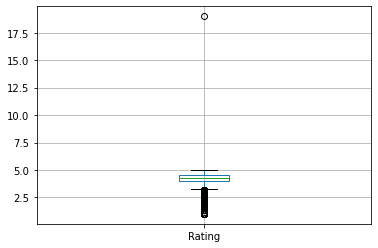

In [31]:
gp.boxplot()            # to find outliers

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F4C9340E20>]],
      dtype=object)

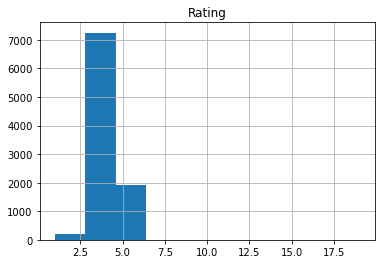

In [32]:
gp.hist()

In [33]:
gp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [34]:
gp.shape

(10841, 13)

# data cleaning

In [35]:
gp.isnull()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,False,False,False,False,False,False,False,False,False,False,False,False,False
10837,False,False,False,False,False,False,False,False,False,False,False,False,False
10838,False,False,True,False,False,False,False,False,False,False,False,False,False
10839,False,False,False,False,False,False,False,False,False,False,False,False,False


In [38]:
gp.isnull().sum()  # it counts the no of missing values in each column

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

# check how many ratings are more than 5_ outliers

In [39]:
gp[gp.Rating>5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [40]:
gp.drop([10472],inplace=True)

In [41]:
gp[10470:10475]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10470,Jazz Wi-Fi,COMMUNICATION,3.4,49,4.0M,"10,000+",Free,0,Everyone,Communication,"February 10, 2017",0.1,2.3 and up
10471,Xposed Wi-Fi-Pwd,PERSONALIZATION,3.5,1042,404k,"100,000+",Free,0,Everyone,Personalization,"August 5, 2014",3.0.0,4.0.3 and up
10473,osmino Wi-Fi: free WiFi,TOOLS,4.2,134203,4.1M,"10,000,000+",Free,0,Everyone,Tools,"August 7, 2018",6.06.14,4.4 and up
10474,Sat-Fi Voice,COMMUNICATION,3.4,37,14M,"1,000+",Free,0,Everyone,Communication,"November 21, 2014",2.2.1.5,2.2 and up
10475,Wi-Fi Visualizer,TOOLS,3.9,132,2.6M,"50,000+",Free,0,Everyone,Tools,"May 17, 2017",0.0.9,2.3 and up


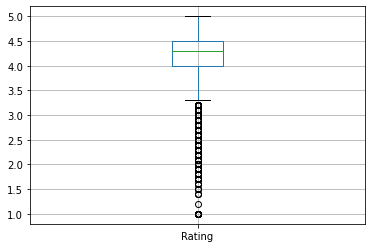

In [42]:
gp.boxplot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F4C9471910>]],
      dtype=object)

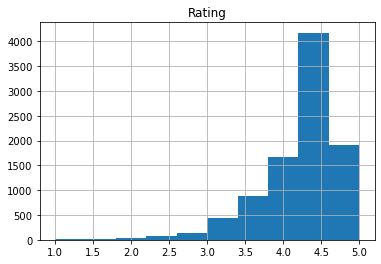

In [43]:
gp.hist()

# remove columns that are 90% empty

In [48]:
threshold=len(gp)*0.1

In [49]:
threshold

1084.0

In [50]:
gp.dropna(thresh=threshold,axis=1,inplace=True)

In [51]:
print(gp.isnull().sum())

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64


In [52]:
gp.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [53]:
gp.shape

(10840, 13)

# data imputation and manipulation

# fill the null values with appropriate values using aggregate func such as mean,median,mode

In [88]:
c=c.fillna(c.mean())

In [89]:
c.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       2
dtype: int64

In [90]:
c.Rating.isnull().sum()

0

In [82]:
c.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [92]:
print(c["Type"].mode())
print(c["Current Ver"].mode())
print(c["Android Ver"].mode())

0    Free
dtype: object
0    Varies with device
dtype: object
0    4.1 and up
dtype: object


In [97]:
# filling the issing categorical variable with mode values
c["Type"].fillna(str(c["Type"].mode().values[0]),inplace=True)
c["Current Ver"].fillna(str(c["Current Ver"].mode().values[0]),inplace=True)
c["Android Ver"].fillna(str(c["Android Ver"].mode().values[0]),inplace=True)

In [98]:
c.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [99]:
c.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


In [100]:
c.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [101]:
# lets convert the price reviews and ratings into numerical values

c["Price"]=c["Price"].apply(lambda x: str(x).replace("$","")if "$"in str(x)else str(x))
c["Price"]=c["Price"].apply(lambda x: float(x))
c["Reviews"]=pd.to_numeric(c["Reviews"],errors="coerce")


In [102]:
c["Installs"]=c["Installs"].apply(lambda x: str(x).replace("+","")if "+"in str(x)else str(x))
c["Installs"]=c["Installs"].apply(lambda x: str(x).replace(",","")if ","in str(x)else str(x))
c["Installs"]=c["Installs"].apply(lambda x: float(x))


In [103]:
c.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000.0,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000.0,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,50000.0,Free,0.0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,50000.0,Free,0.0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,1000000.0,Free,0.0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,1000000.0,Free,0.0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,10000.0,Free,0.0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


In [104]:
c.describe()   # summanry stats

,Rating,Reviews,Installs,Price
count,10840.000000,1.084000e+04,1.084000e+04,10840.000000
mean,4.191757,4.441529e+05,1.546434e+07,1.027368
std,0.478907,2.927761e+06,8.502936e+07,15.949703
min,1.000000,0.000000e+00,0.000000e+00,0.000000
25%,4.100000,3.800000e+01,1.000000e+03,0.000000
50%,4.200000,2.094000e+03,1.000000e+05,0.000000
75%,4.500000,5.477550e+04,5.000000e+06,0.000000
max,5.000000,7.815831e+07,1.000000e+09,400.000000


#  DATA VISUALIZATION

In [108]:
grp=c.groupby("Category")
j=grp["Rating"].agg(np.mean)    # here taking the rating column from the data set and agggreagating it to the mean
k=grp["Price"].agg(np.sum)      # here taking the price column from the data set and aggregating it to the sum
l=grp["Reviews"].agg(np.mean)   # here taking tghe review col and aggregating it to the mean value
print(j)
print(k)
print(l)

Category
ART_AND_DESIGN         4.350389
AUTO_AND_VEHICLES      4.190601
BEAUTY                 4.260553
BOOKS_AND_REFERENCE    4.310663
BUSINESS               4.145448
COMICS                 4.156392
COMMUNICATION          4.163601
DATING                 4.007601
EDUCATION              4.387768
ENTERTAINMENT          4.126174
EVENTS                 4.363178
FAMILY                 4.192214
FINANCE                4.138922
FOOD_AND_DRINK         4.170485
GAME                   4.282441
HEALTH_AND_FITNESS     4.266092
HOUSE_AND_HOME         4.196603
LIBRARIES_AND_DEMO     4.181590
LIFESTYLE              4.112145
MAPS_AND_NAVIGATION    4.064911
MEDICAL                4.189781
NEWS_AND_MAGAZINES     4.142713
PARENTING              4.281960
PERSONALIZATION        4.307288
PHOTOGRAPHY            4.192094
PRODUCTIVITY           4.208015
SHOPPING               4.253918
SOCIAL                 4.247808
SPORTS                 4.218136
TOOLS                  4.066075
TRAVEL_AND_LOCAL       4.119520

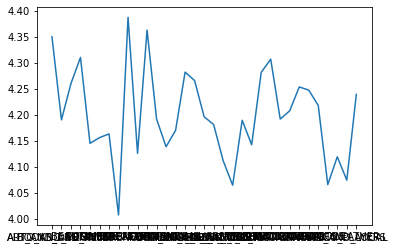

In [109]:
plt.plot(j)

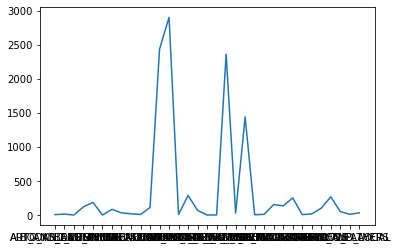

In [110]:
plt.plot(k)

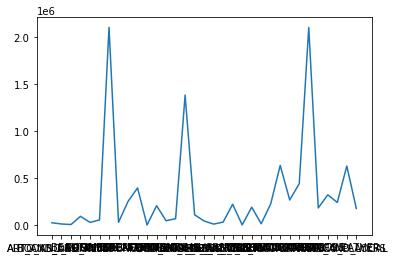

In [111]:
plt.plot(l)

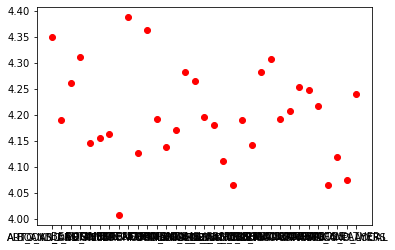

In [112]:
plt.plot(j, "ro")

<function matplotlib.pyplot.show(*args, **kw)>

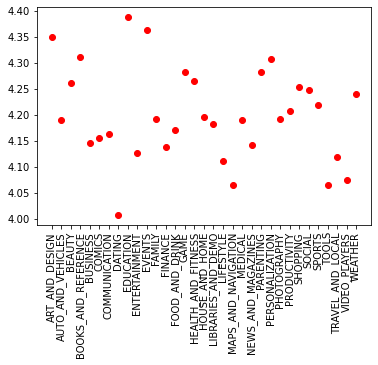

In [114]:
plt.plot(j,"ro")
plt.xticks(rotation=90)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

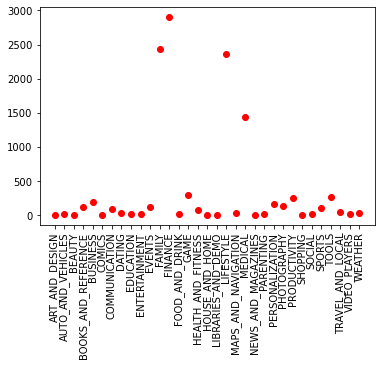

In [115]:
plt.plot(k,"ro")
plt.xticks(rotation=90)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

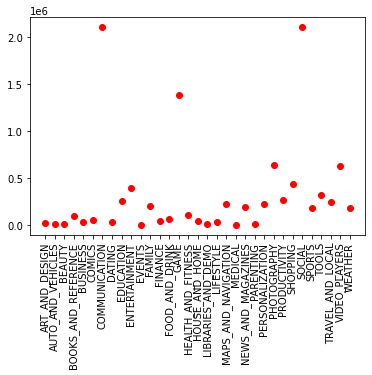

In [116]:
plt.plot(l,"ro")
plt.xticks(rotation=90)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

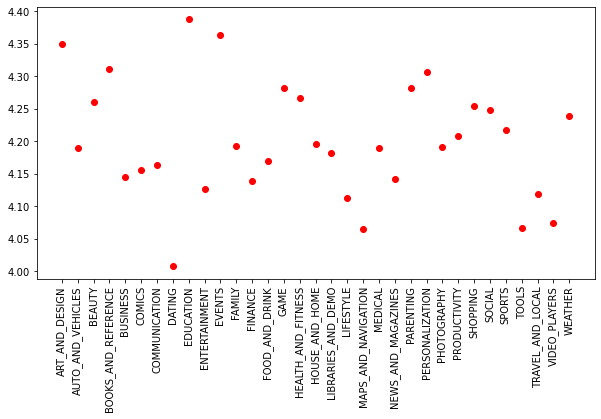

In [120]:
plt.figure(figsize=(10,5))
plt.plot(j,"ro")
plt.xticks(rotation=90)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

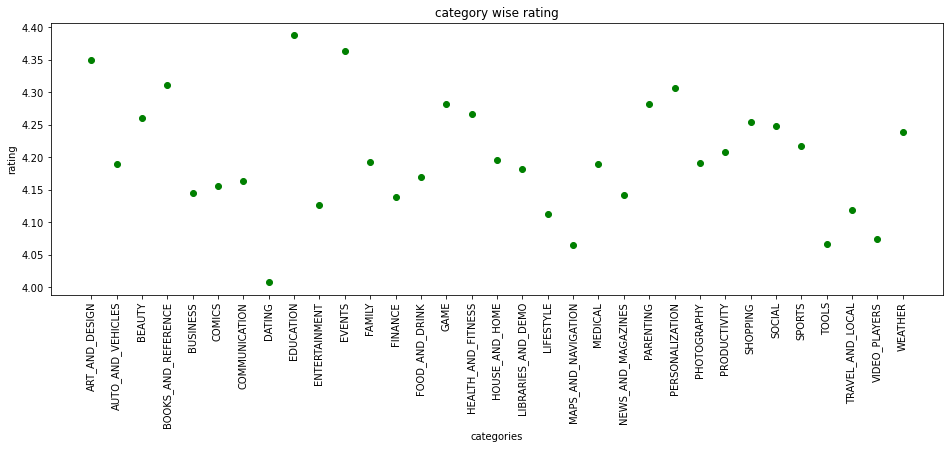

In [122]:
plt.figure(figsize=(16,5))
plt.plot(j,"ro", color="g")
plt.xticks(rotation=90)
plt.title("category wise rating")
plt.xlabel("categories")
plt.ylabel("rating")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

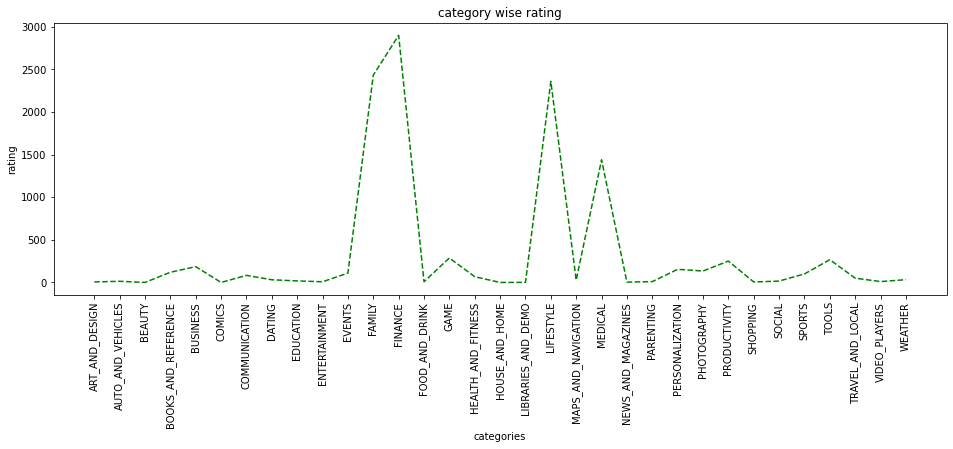

In [123]:
plt.figure(figsize=(16,5))
plt.plot(k,"r--", color="g")
plt.xticks(rotation=90)
plt.title("category wise rating")
plt.xlabel("categories")
plt.ylabel("rating")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

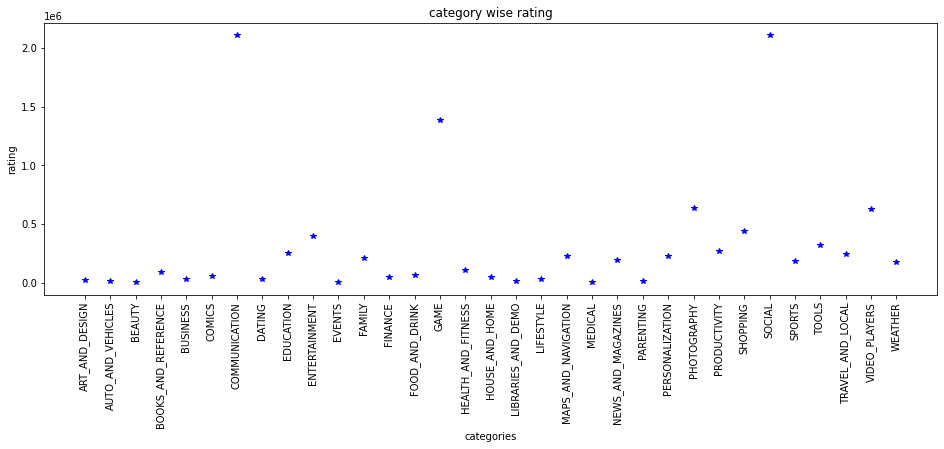

In [125]:
plt.figure(figsize=(16,5))
plt.plot(l,"r*", color="b")
plt.xticks(rotation=90)
plt.title("category wise rating")
plt.xlabel("categories")
plt.ylabel("rating")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

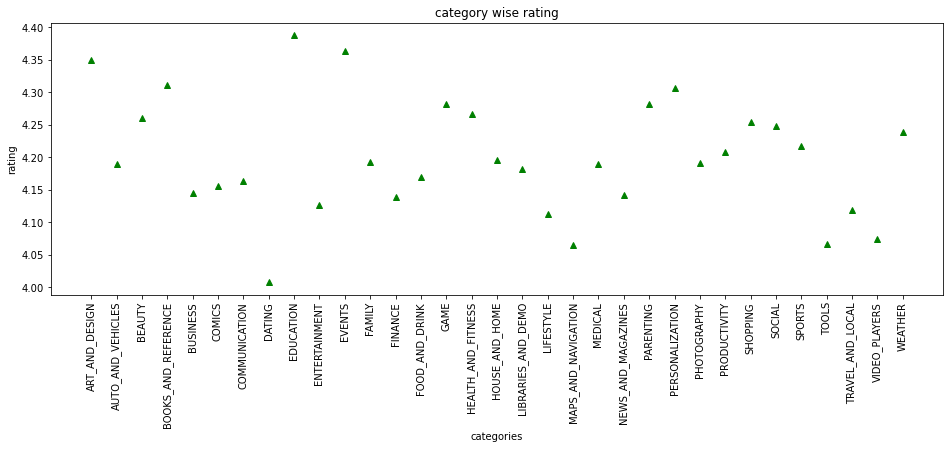

In [126]:
plt.figure(figsize=(16,5))
plt.plot(j,"r^", color="g")
plt.xticks(rotation=90)
plt.title("category wise rating")
plt.xlabel("categories")
plt.ylabel("rating")
plt.show

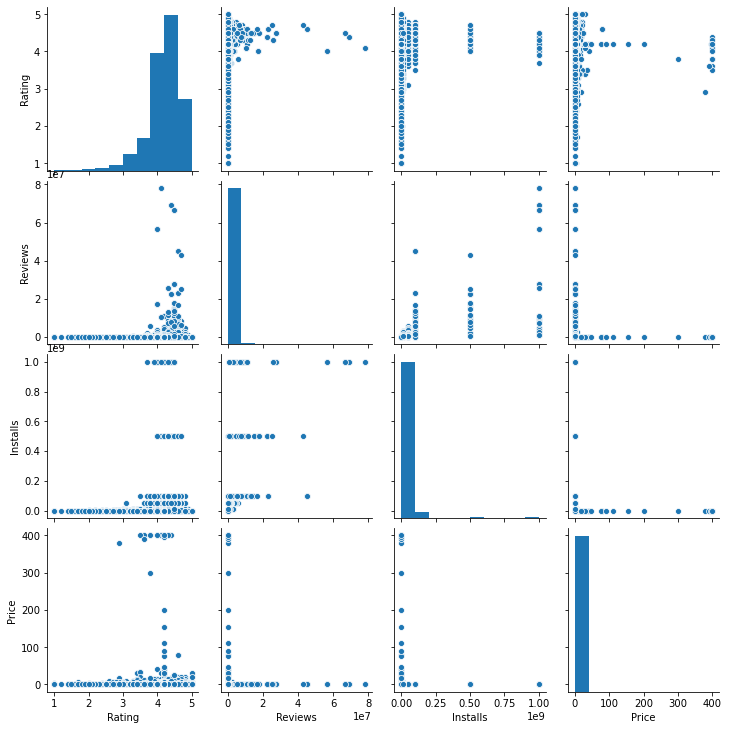

In [127]:
sbn.pairplot(c)